#### Pour Installer la bibliothéque "ipywidgets" enlever le "#" et éxectuer le bloque

In [281]:
#conda install -c conda-forge ipympl

#### Déclaration des Bibliothéques

In [282]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

In [283]:
f=lambda x:1/(1+x**2)

### Méthode des Rectangles

In [284]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title('Methode des Rectangles Gauches, N = {}'.format(self.n))
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

### Méthode des Trapézes

In [285]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title('Methode des Trapézes, N = {}'.format(self.n))
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

### Méthode de Simpson

In [286]:
class Simps ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        
        if self.n % 2 == 1:
            raise ValueError("N doit étre paire ! ")
        dx = (self.b-self.a)/self.n
        x = np.linspace(self.a,self.b,self.n+1)
        y = f(x)
        S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
        return S
        
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ]] # abscisses des sommets
            y_rect = [0 , yl[ i ]] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title('Methode de Simpson, N = {}'.format(self.n))
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

### Méthode des Points Fixes

In [287]:
class Pt_milieu(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        h = float(self.b-self.a)/self.n
        result = 0
        for i in range(self.n):
            result += f((self.a + h/2.0) + i*h)
        result *= h
        return result
    def Graph(self,f,resolution=1001):
        N=10
        x = np.linspace(self.a,self.b,N+1)
        y = f(x)

        X = np.linspace(self.a,self.b,self.n*N+1)
        Y = f(X)

        plt.plot(X,Y,'b')
        x_mid = (x[:-1] + x[1:])/2 # Midpoints
        y_mid = f(x_mid)
        plt.plot(x_mid,y_mid,'b.',markersize=10)
        plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
        plt.title('Methode des Point Fixes, N = {}'.format(self.n))
        plt.ylabel ( ' f ( x ) ' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

### Simulation

In [288]:
def simule(n,f):
    
    R=RectangleG(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f) 
    fig= plt.figure(figsize=(15,10))
    plt.subplot(221)
    R.Graph(f)  
    plt.subplot(222)    
    T.Graph(f)
    M=Pt_milieu(-2,2,n,f)
    plt.subplot(223)
    M.Graph(f)
    
    if n%2 == 0: #Il faut que N soit paire !
        S=Simps(-1,1,n,f) 
        plt.subplot(224)
        S.Graph(f)
    else:
        print("Simpson indesponible car N={} est impaire".format(n))
    plt.show()


### Les Figures 

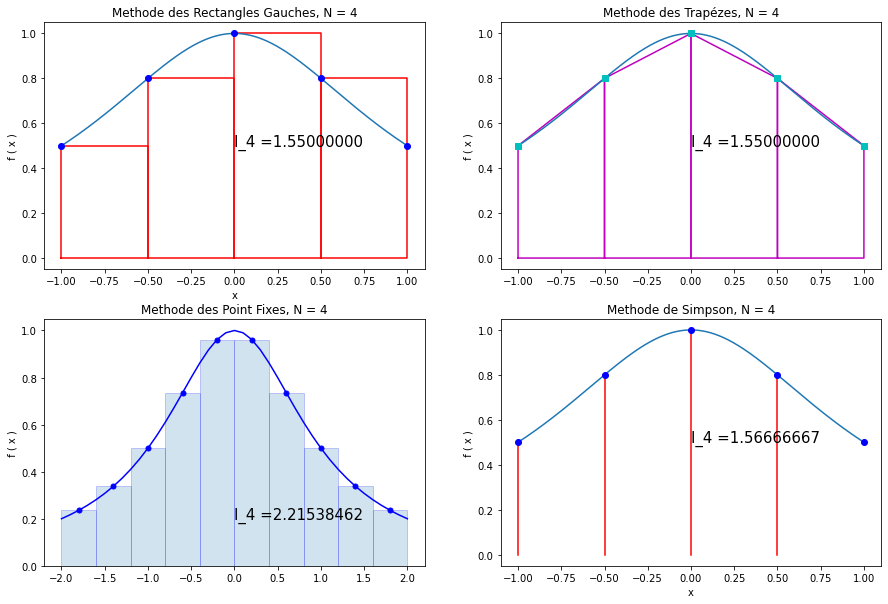

In [289]:
simule(4,f)